# Introduction to Machine Learning - Linear Regression

**Author:** Taylor Martin

**Repository:** https://github.com/tmartin-m/datafun-07-applied


In [267]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
import scipy

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.datasets import fetch_california_housing
from sklearn import metrics
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.model_selection import KFold, cross_val_score

## Part 1 - Chart a Straight Line

In Part 1, we convert temperatures from Fahrenheit to Celsius, store the results in a DataFrame and plot the conversion as a line graph.

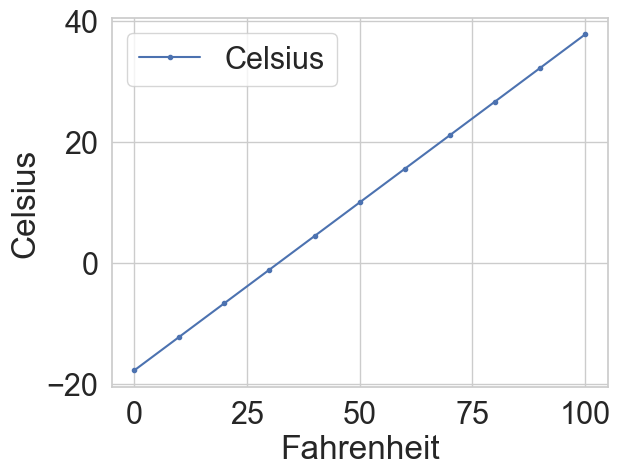

In [268]:
c = lambda f: 5/9*(f-32)
temps = [(f, c(f)) for f in range(0, 101, 10)]
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

This chart visually demonstrates the linear relationship between Fahrenheit and Celsius temperatures.

## Part 2 - Prediction

### Section 1 - Data Acquistion

In Data Acquisition we use Pandas to read a CSV file and load its contents into a DataFrame we named nyc_df.

In [269]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')


### Section 2 - Data Inspection

In Data Inspection, we use call the first 5 lines, and the last 5 lines of the DataFrame to review.

In [270]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [271]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In Data Cleaning, we rename the columns and view the first 3 rows of the DataFrame to visualize the update. We also convert the Date column from a year-month format (like 189501) to just the year (like 1895) and view the first 3 rows to confirm the change.

In [272]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [273]:
nyc_df.Date.dtype

dtype('int64')

In [274]:
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

In Descriptive Statistics, we show the summary statistics of the NYC DataFrame using the display.precision code to show each stat to 2 decimal places.

In [275]:
pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

The average temperature of the 10 records in 31.12 degrees; with the lowest tempterature being 29.80 degrees and the highest being 33.00 degrees. The majority of the records falls below 31.95 degrees.

### Section 5 - Build the Model

In [276]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)

In [277]:
linear_regression.slope

np.float64(0.014771361132966163)

In [278]:
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6 - Predict

In [279]:
linear_regression.slope * 2019 + linear_regression.intercept

np.float64(38.51837136113297)

In [280]:
linear_regression.slope * 1890 + linear_regression.intercept

np.float64(36.612865774980335)

In [282]:
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

### Section 7 - Visualizations

(10.0, 70.0)

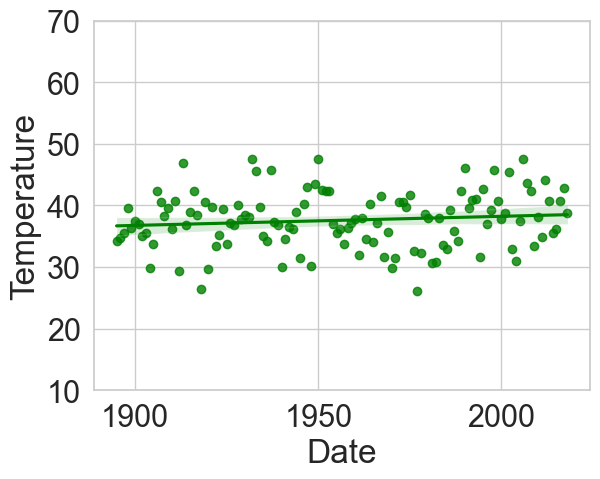

In [283]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature, color='green')
axes.set_ylim(10, 70)

## Part 3 - Prediction

### Section 1 - Build the Model

In [284]:
X_train, X_test, y_train, y_test = train_test_split(nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values, random_state=11)

In [285]:
X_train.shape

(93, 1)

In [286]:
X_test.shape

(31, 1)

In [287]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [288]:
linear_regression.coef_

array([0.01939167])

In [289]:
linear_regression.intercept_

np.float64(-0.30779820252656975)

### Section 2 - Test the Model

In [290]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict

In [291]:
predict = lambda x: linear_regression.coef_ * x + linear_regression.intercept_

In [292]:
predict(2024)

array([38.94094855])

### Section 4 - Visualizations

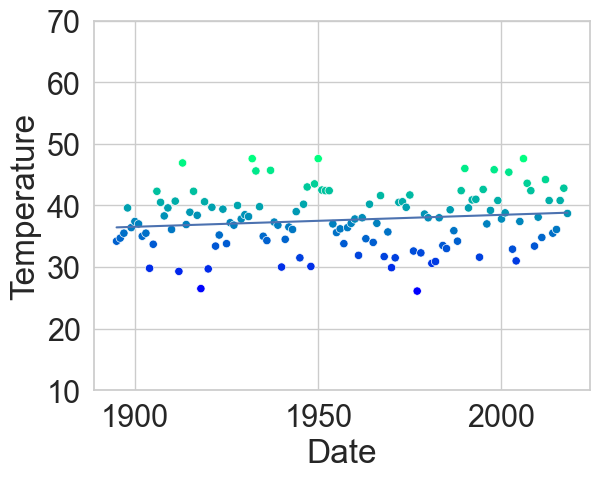

In [293]:
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature',
     hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10, 70)

x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])

y = predict(x)

line = plt.plot(x, y)

## Part 4 - Insights

## Part 5 - Bonus

### Loading the Data

In [294]:
california = fetch_california_housing()

### Displaying the Data

In [295]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [296]:
california.data.shape

(20640, 8)

In [297]:
california.target.shape

(20640,)

In [298]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [299]:
pd.set_option('display.precision', 4)
pd.set_option('display.max_columns', 9)
pd.set_option('display.width', None)

### Cleaning the Data

In [300]:
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['MedHouseValue'] = pd.Series(california.target)
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23,4.526
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22,3.585
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24,3.521
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25,3.413
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25,3.422


### Descriptive Statistics

In [301]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


### Visualizing the Features

In [302]:
sample_df = california_df.sample(frac=0.1, random_state=17)
sns.set(font_scale=2)
sns.set_style('whitegrid')   

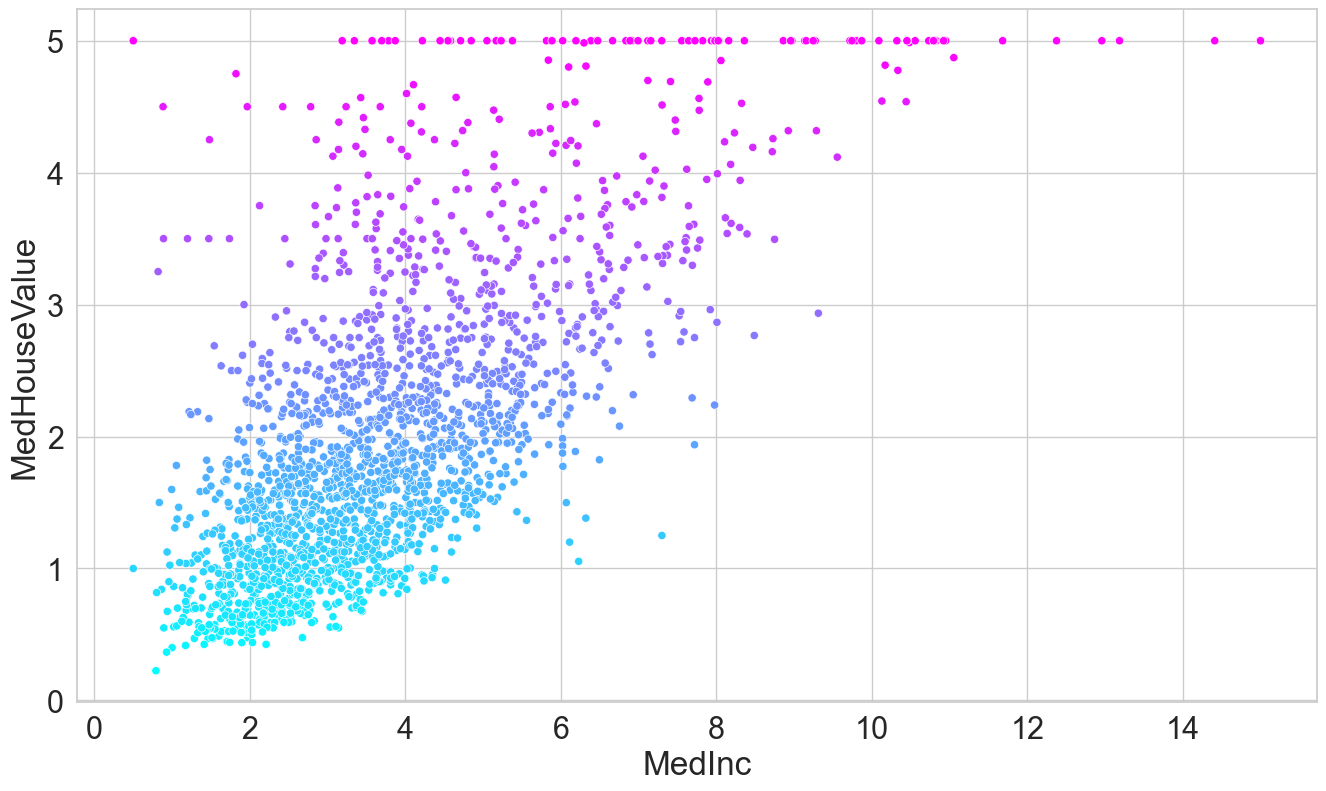

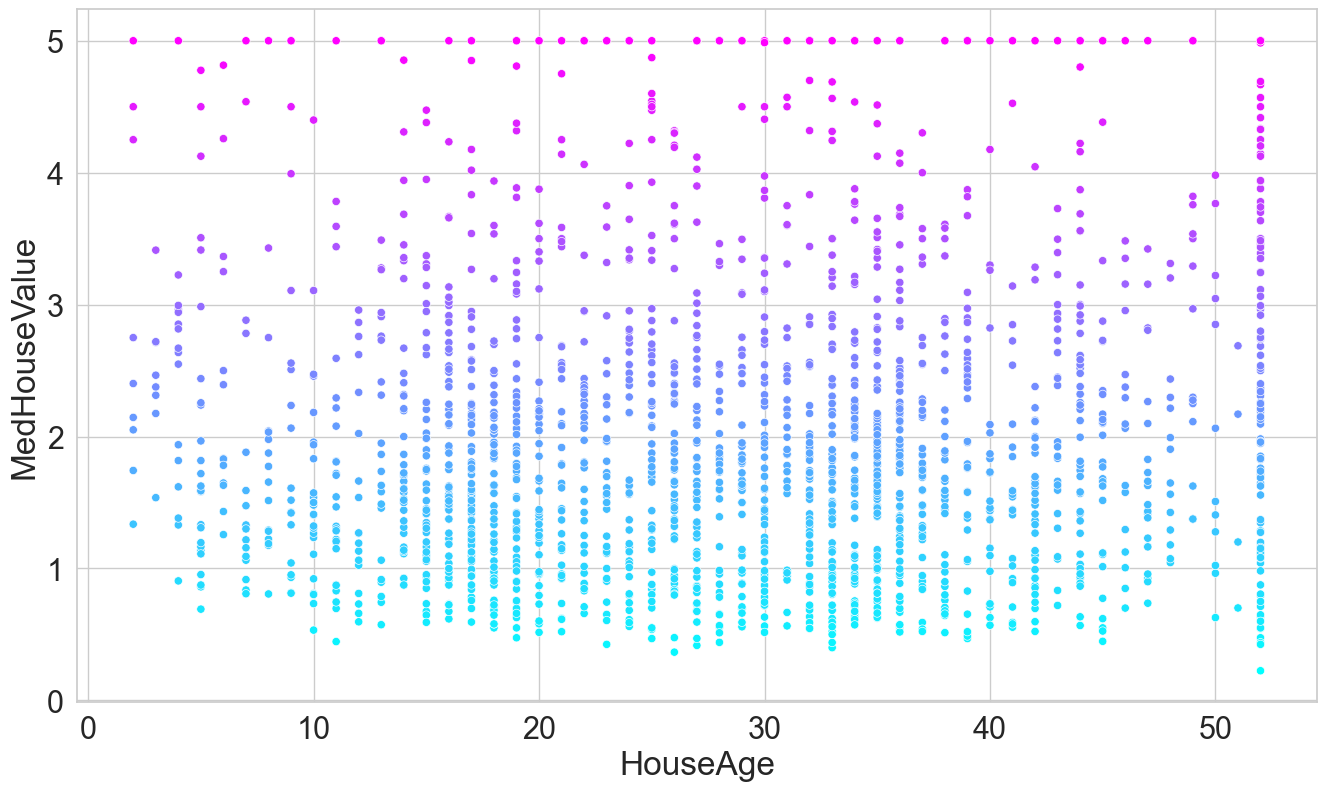

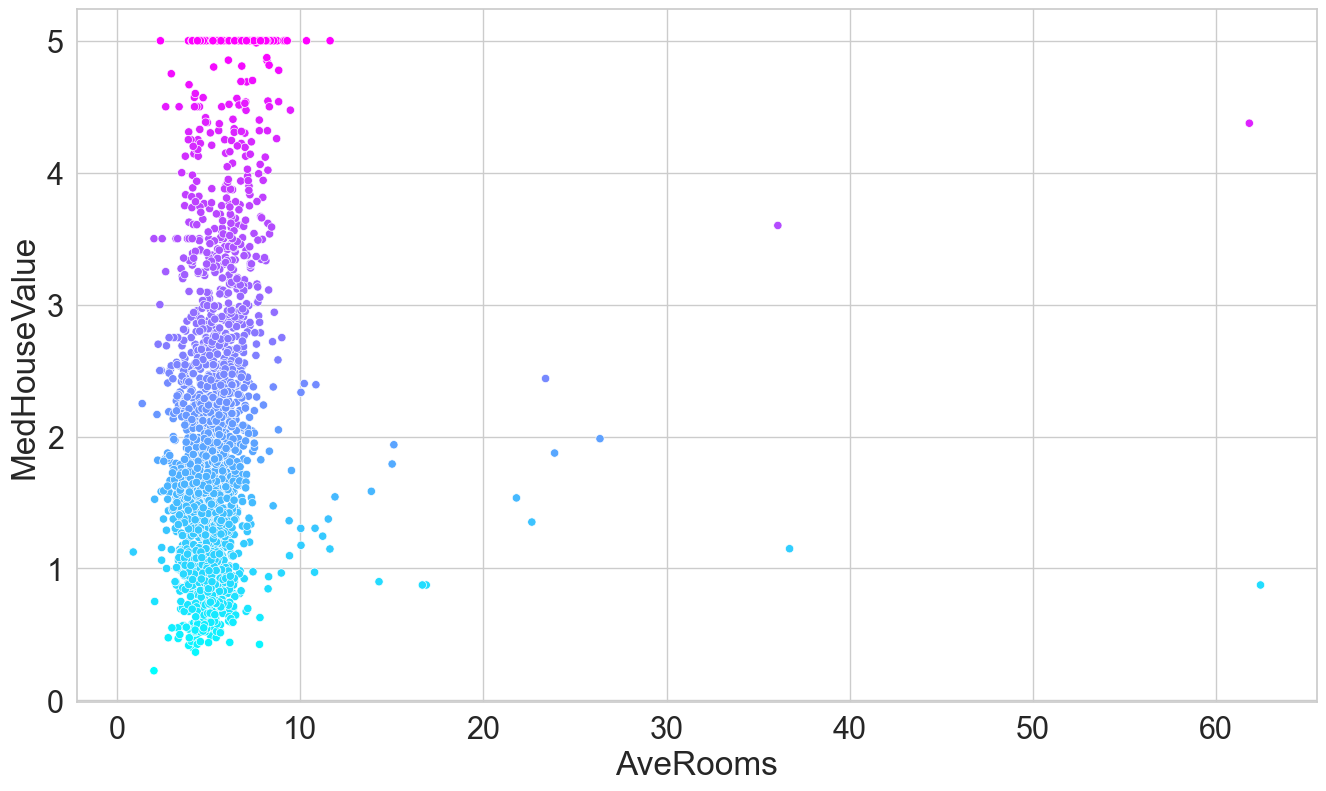

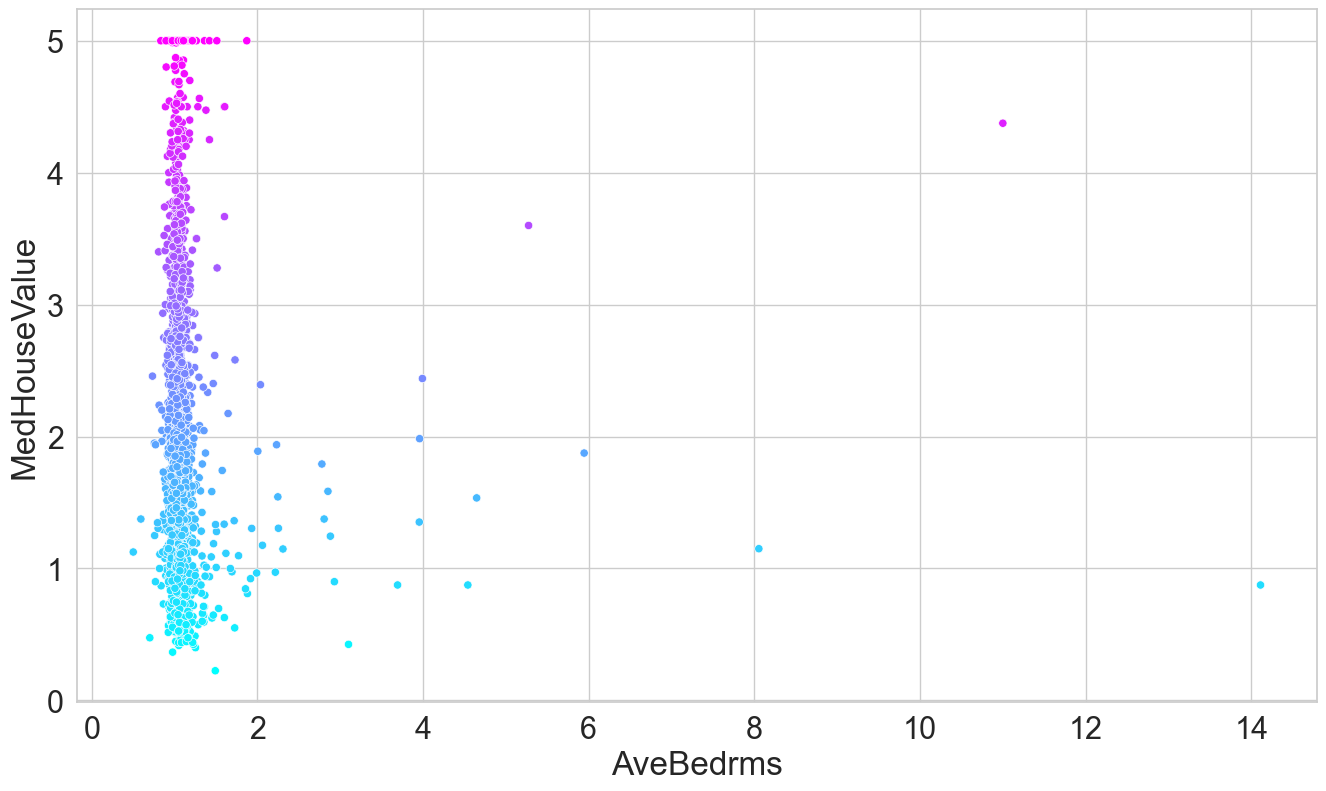

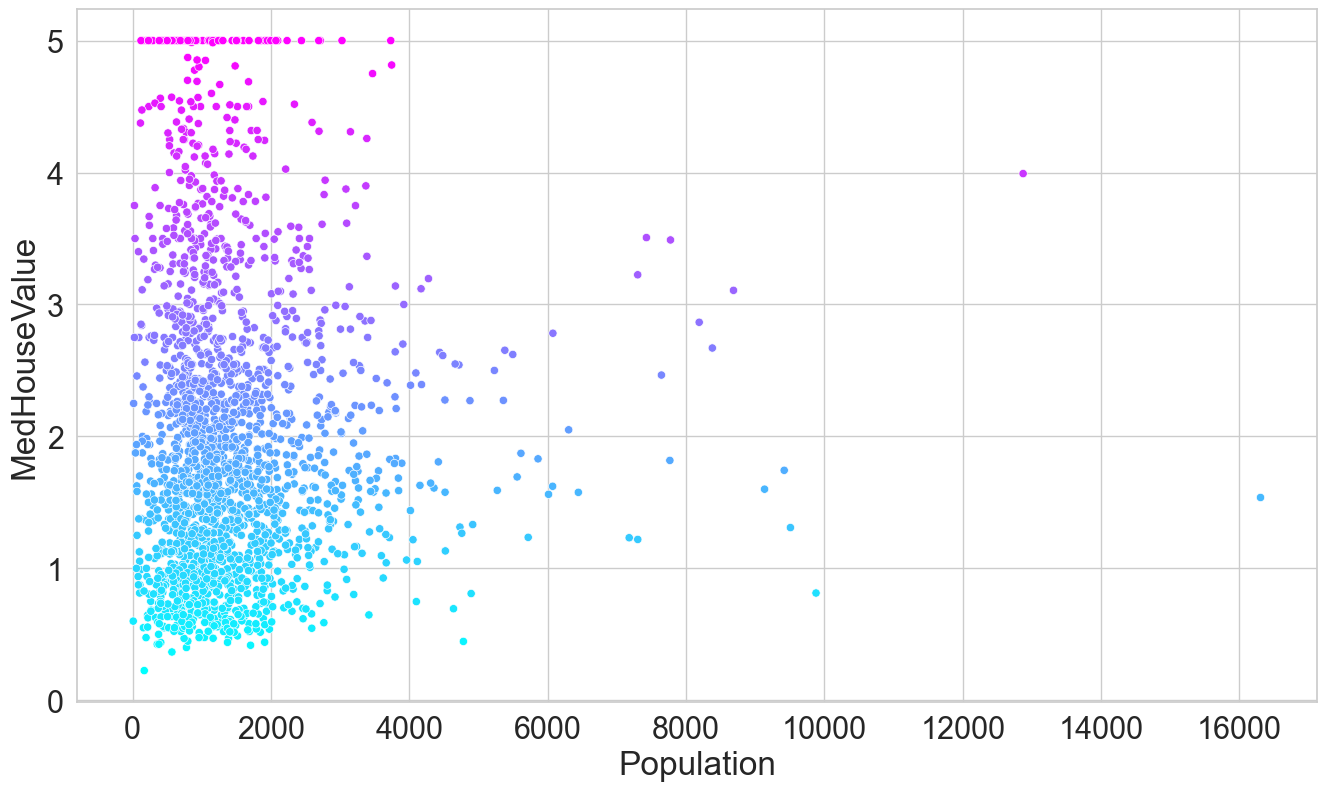

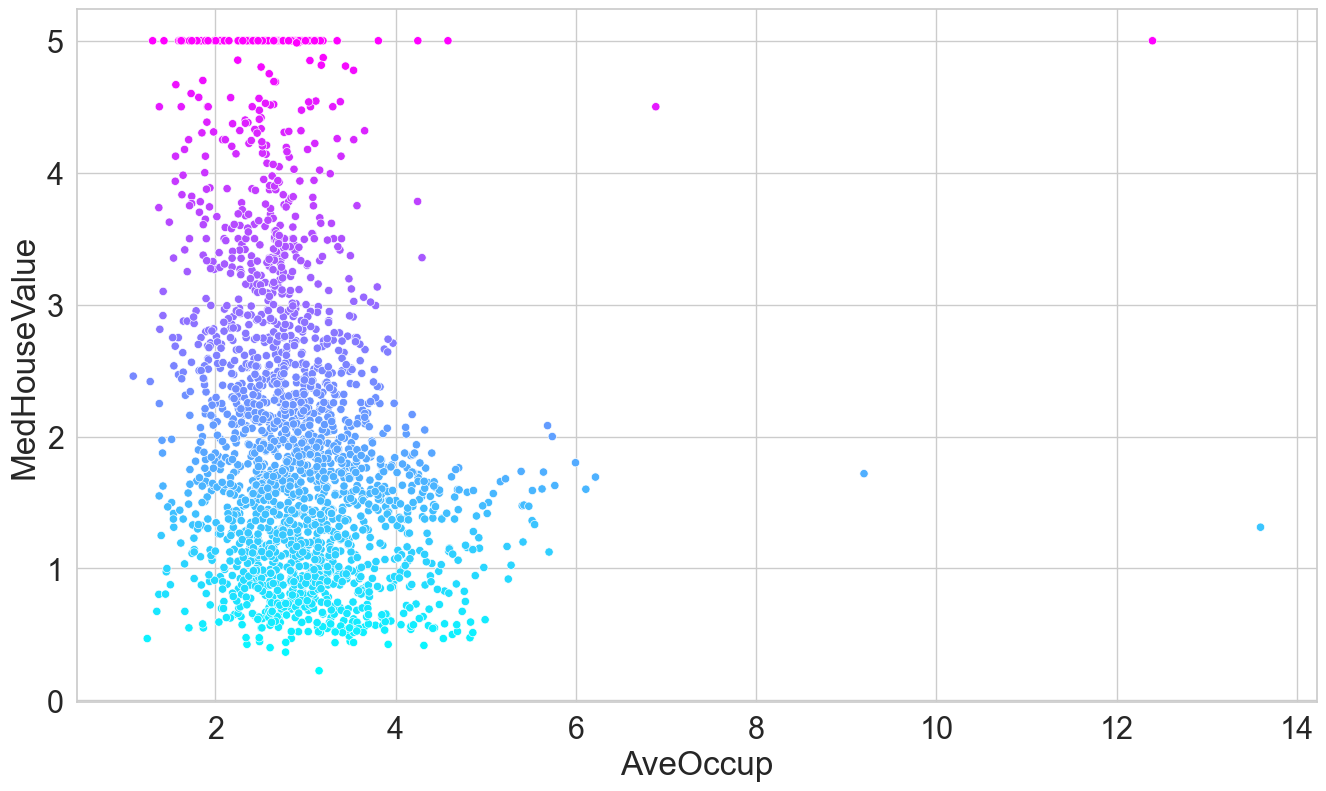

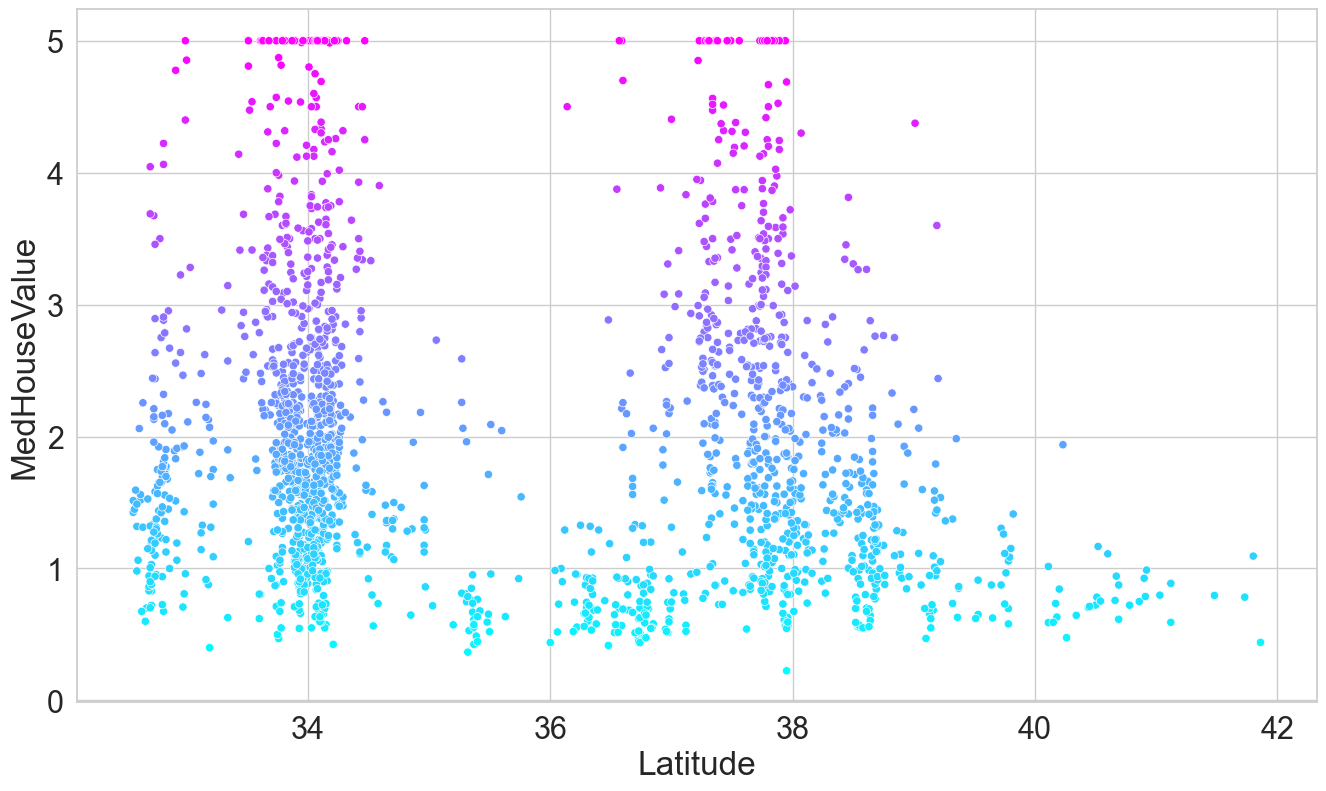

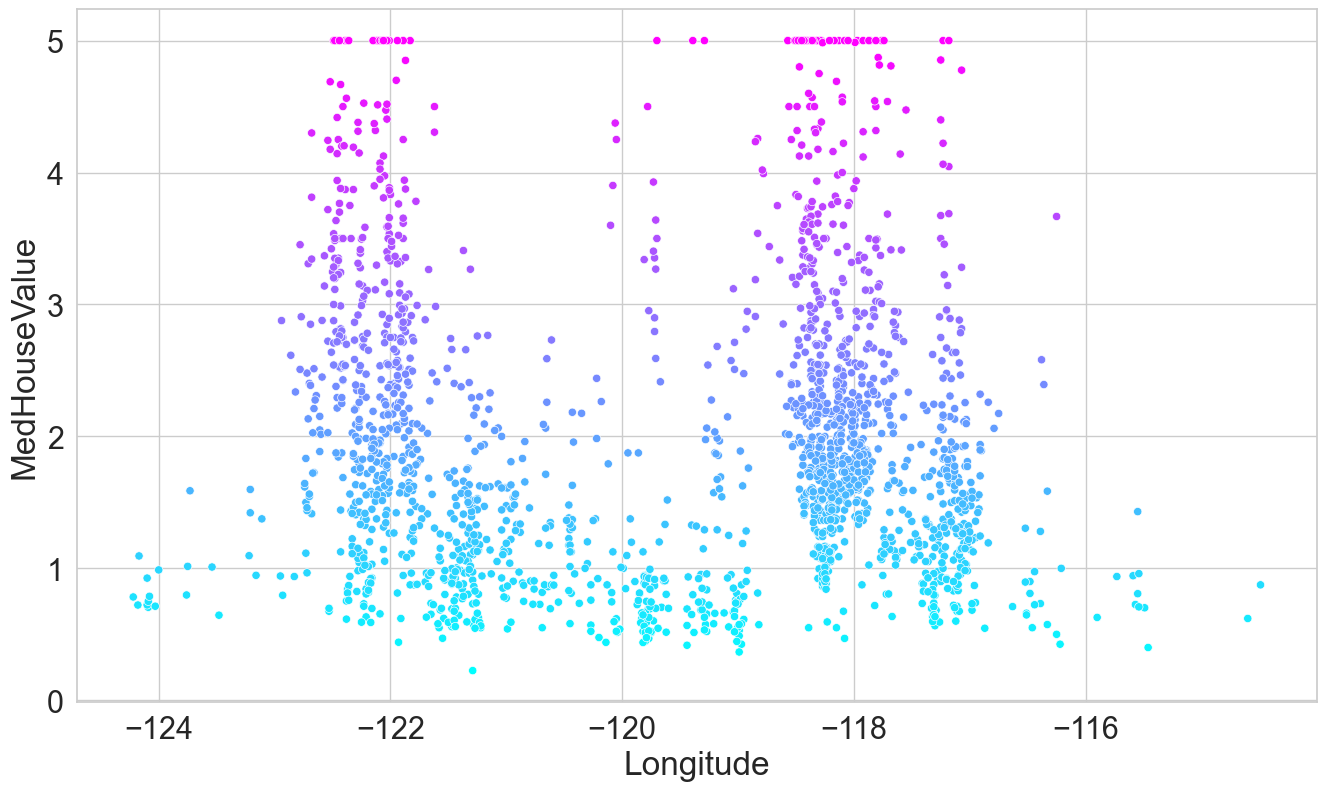

In [303]:
for feature in california.feature_names:
     plt.figure(figsize=(16, 9))
     sns.scatterplot(data=sample_df, x=feature, y='MedHouseValue', hue='MedHouseValue', palette='cool', legend=False)

### Splitting the Data for Training and Testing

In [304]:
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, random_state=11)

In [305]:
X_train.shape

(15480, 8)

In [306]:
X_test.shape

(5160, 8)

### Training the Model

In [307]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [308]:
for i, name in enumerate(california.feature_names): print(f'{name:>10}: {linear_regression.coef_[i]}')

    MedInc: 0.43770302153822016
  HouseAge: 0.009216834565797695
  AveRooms: -0.1073252663736094
 AveBedrms: 0.6117133073918101
Population: -5.756822009296558e-06
  AveOccup: -0.0033845664657163226
  Latitude: -0.4194818609649083
 Longitude: -0.43377133498740217


In [309]:
linear_regression.intercept_

np.float64(-36.8829506560555)

### Testing the Model

In [310]:
predicted = linear_regression.predict(X_test)
expected = y_test

In [311]:
predicted[:5]

array([1.25396876, 2.34693107, 2.03794745, 1.8701254 , 2.53608339])

In [312]:
expected[:5]

array([0.762, 1.732, 1.125, 1.37 , 1.856])

### Visualizing the Expected vs. Predicted Prices

In [313]:
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

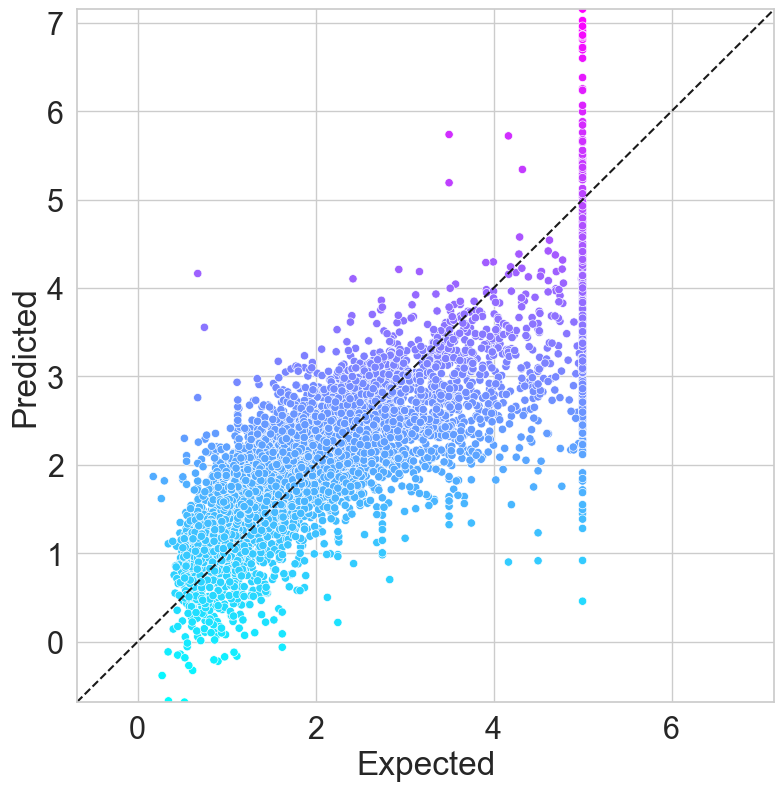

In [314]:
figure = plt.figure(figsize=(9, 9))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())
axes.set_xlim(start, end)
axes.set_ylim(start, end)
line = plt.plot([start, end], [start, end], 'k--')

### Regression Model

In [315]:
metrics.r2_score(expected, predicted)

0.6008983115964331

In [316]:
metrics.mean_squared_error(expected, predicted)

0.535014977444912

### Choosing the Best Model

In [317]:
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

In [318]:
for estimator_name, estimator_object in estimators.items():
     kfold = KFold(n_splits=10, random_state=11, shuffle=True)
     scores = cross_val_score(estimator=estimator_object, X=california.data, y=california.target, cv=kfold, scoring='r2')
     print(f'{estimator_name:>16}: ' + f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.599
      ElasticNet: mean of r2 scores=0.423
           Lasso: mean of r2 scores=0.285
           Ridge: mean of r2 scores=0.599
